In [86]:
# Importing Libraries.

# Data Processing.
import pandas as pd
import numpy as np

# Handling Null Values.
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 

# Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluating the linearity of relationships between variables and the distribution of variables (Statistics).
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuration.
pd.set_option('display.max_columns', None) # To visualize all columns in the DataFrames.

# Managing Warnings.
import warnings
warnings.filterwarnings("ignore")

In [87]:
df_talent = pd.read_csv('transformando_talento.csv')


## PHASE 1: EDA

## 1.1 Preliminary Exploration

In [88]:
df_talent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13  HourlyRate                1614 non-null   object 
 14  JobInvol

In [89]:
display(df_talent.head(20))


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


In [90]:
round(df_talent.describe(), 2).T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1614.0,806.50,466.07,0.0,403.25,806.5,1209.75,1613.0
DistanceFromHome,1614.0,4.53,14.59,-49.0,2.00,5.0,11.00,29.0
Education,1614.0,2.93,1.02,1.0,2.00,3.0,4.00,5.0
employeecount,1614.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1614.0,4.29,6.99,1.0,2.00,3.0,4.00,49.0
Gender,1614.0,0.40,0.49,0.0,0.00,0.0,1.00,1.0
JobInvolvement,1614.0,2.74,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1614.0,2.07,1.10,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1614.0,2.74,1.11,1.0,2.00,3.0,4.00,4.0
MonthlyRate,1614.0,14284.50,7110.41,2094.0,8001.00,14248.5,20364.00,26999.0


In [91]:
print(df_talent.columns)


Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')


In [92]:
# View the percentage of null values in numerical columns, but only display those greater than 0.
null_percent = (df_talent.isnull().sum() / len(df_talent) * 100).sort_values(ascending=False)
null_percent[null_percent > 0]


NUMBERCHILDREN         100.000000
YearsInCurrentRole      97.893432
RoleDepartament         81.288724
Department              81.288724
StandardHours           74.039653
Over18                  55.824040
SameAsMonthlyIncome     52.230483
MonthlyIncome           52.230483
BusinessTravel          47.831475
EducationField          46.158612
OverTime                41.883519
MaritalStatus           40.334572
TOTALWORKINGYEARS       32.589839
employeenumber          26.703841
PerformanceRating       12.081784
WORKLIFEBALANCE          6.691450
dtype: float64

In [93]:
# Check for duplicate records.
df_talent[df_talent.duplicated(keep=False)]
df_talent.duplicated().sum()


0

🔎 After this initial exploration, we see that the dataset has 1,614 rows and 42 columns, which are alphabetically organized.

        The main issues are:
- A huge number of null values in some columns.
- Fully duplicated records.
- Numerous irregular formats.
- Redundant columns.
- Columns with few useful data points.
- Columns with numerical values stored as object type.


⚀ As a first step, due to the lack of consistency in column names, we will normalize them by converting everything to lowercase and replacing spaces with "_". 

*We will apply this rule to all dataset values.*

In [94]:
df_talent.columns = df_talent.columns.str.lower().str.replace(" ", "_")
df_talent.rename(columns={
    "roledepartament": "role_department",
    "totalworkingyears": "total_working_years",
    "businesstravel": "business_travel",
    "employeenumber": "employee_number",
    "environmentsatisfaction": "environment_satisfaction",
    "jobinvolvement": "job_involvement",
    "joblevel": "job_level",
    "jobsatisfaction": "job_satisfaction",
    "monthlyincome": "monthly_income",
    "monthlyrate": "monthly_rate",
    "distancefromhome": "distance_from_home",
    "educationfield": "education_field",
    "employeecount": "employee_count",
    "numcompaniesworked": "num_companies_worked",
    "over18": "over_18",
    "performancerating": "performance_rating",
    "standardhours": "standard_hours",
    "yearsatcompany": "years_at_company",
    "yearsincurrentrole": "years_in_current_role",
    "yearssincelastpromotion": "years_since_last_promotion",
    "yearswithcurrmanager": "years_with_curr_manager",
    "datebirth": "date_birth",
    "remotework": "remote_work",
    "numberchildren": "num_children",
    "sameasmonthlyincome": "same_as_monthly_income",
    "dailyrate": "daily_rate",
    "hourlyrate": "hourly_rate",
    "jobrole": "job_role",
    "maritalstatus": "marital_status",
    "percentsalaryhike": "percent_salary_hike",
    "relationshipsatisfaction": "relationship_satisfaction",
    "stockoptionlevel": "stock_option_level",
    "trainingtimeslastyear": "training_times_last_year",
    "worklifebalance": "work_life_balance"
}, inplace=True)


In [95]:
print(df_talent.columns)


Index(['unnamed:_0', 'age', 'attrition', 'business_travel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_18', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [96]:
df_talent.sample(10)


,unnamed:_0,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_department,num_children,remote_work
886,886,29,No,NaN,"1283,0$",Research & Development,-17,3,NaN,1,"495,0",17,0,54,3,1,ReseArCh SciENTIsT,4,NaN,NaN,18168,9,NaN,No,16,NaN,4,NaN,0,"6,0",4,"3,0",3,NaN,1,2,NaN,1994,1000000000$,ReseArCh SciENTIsT - Research & Development,NaN,0
85,85,41,No,NaN,"334,0$",NaN,-10,4,NaN,1,NaN,4,0,88,3,4,MAnager,2,NaN,"16015,0",15896,1,NaN,NaN,19,"3,0",2,NaN,0,NaN,2,"3,0",22,NaN,0,4,"16015,0",1982,1000000000$,NaN,NaN,Yes
1262,1262,38,No,travel_rarely,"1261,0$",NaN,-38,4,NaN,1,"271,0",4,0,Not Available,3,2,ManUfactuRIng diREcTOR,3,NaN,"6553,0",7259,9,NaN,NaN,14,"3,0",2,"80,0",0,"14,0",3,"3,0",1,NaN,0,0,"6553,0",1985,1000000000$,NaN,NaN,False
1230,1230,21,No,travel_rarely,"391,0$",NaN,15,2,NaN,1,"30,0",3,0,96,3,1,rEsEarCH SCieNTist,4,Single,NaN,19281,1,Y,No,14,"3,0",4,NaN,0,"0,0",6,"3,0",0,NaN,0,0,NaN,2002,1000000000$,NaN,NaN,Yes
917,917,48,No,travel_rarely,"1236,0$",NaN,1,4,NaN,1,"664,0",4,1,40,2,4,ManageR,1,Married,NaN,17997,7,NaN,No,11,"3,0",1,NaN,1,"21,0",3,"1,0",3,NaN,0,2,NaN,1975,1000000000$,NaN,NaN,1
900,900,52,No,travel_rarely,"1490,0$",NaN,4,2,Life Sciences,1,NaN,4,1,Not Available,3,4,MAnAGeR,4,Married,NaN,10310,2,Y,No,13,"3,0",4,NaN,0,"31,0",2,"1,0",5,NaN,1,4,NaN,1971,1000000000$,NaN,NaN,False
1355,1355,50,No,travel_rarely,"804,0$",Research & Development,9,3,NaN,1,NaN,1,0,64,3,1,LaBorAtOrY teCHNICIAn,4,Married,"2380,0",20165,4,NaN,No,18,NaN,2,NaN,0,"8,0",5,"3,0",1,NaN,0,0,"2380,0",1973,1000000000$,LaBorAtOrY teCHNICIAn - Research & Developm...,NaN,1
1365,1365,50,Yes,NaN,nan$,NaN,1,4,NaN,1,"1113,0",4,0,81,3,2,sales EXecUTIvE,3,Single,"4728,0",17251,3,Y,Yes,14,"3,0",4,"80,0",0,"5,0",4,"3,0",0,NaN,0,0,"4728,0",1973,1000000000$,NaN,NaN,True
551,551,26,No,NaN,"583,0$",Research & Development,4,2,Life Sciences,1,NaN,3,0,53,3,1,ResEArch ScieNTiST,4,NaN,NaN,9973,1,NaN,Yes,20,"4,0",2,"80,0",0,NaN,2,"2,0",8,NaN,2,2,NaN,1997,1000000000$,ResEArch ScieNTiST - Research & Development,NaN,0
1580,1580,39,No,NaN,"408,0$",NaN,2,4,Technical Degree,1,"721,0",4,1,80,2,2,HeaLTHcARE reprESenTAtIve,3,Single,NaN,20978,1,NaN,No,11,"3,0",1,NaN,0,"20,0",4,"3,0",20,"7,0",11,10,NaN,1984,1000000000$,NaN,NaN,0


**CLEANING IN ORDER OF APPEARANCE IN .INFO**

Given the complexity of this dataset and to avoid missing errors along the way, we will review each column one by one, carefully examining the data and acting accordingly. This may be the slowest method, but it allows us to fully understand the meaning of each column.

In [97]:
# Keep in mind the percentage of null values we will find in each column.
nan_columns = df_talent[df_talent.columns[df_talent.isnull().any()]]

for col in nan_columns:
    print(f"Distribution of Categories (including null values 🏴) for Each Column", col)
    display(df_talent[col].value_counts(dropna=False, normalize=True) * 100) 
    print("........................")
    

Distribution of Categories (including null values 🏴) for Each Column business_travel


business_travel
NaN                  47.831475
travel_rarely        36.307311
travel_frequently    10.223048
non-travel            5.638166
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column department


department
NaN                         81.288724
 Research & Development     12.143742
 Sales                       5.638166
 Human Resources             0.929368
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column education_field


education_field
NaN                 46.158612
Life Sciences       21.623296
Medical             17.100372
Marketing            6.443618
Technical Degree     4.275093
Other                3.655514
Human Resources      0.743494
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column employee_number


employee_number
NaN       26.703841
482,0      0.123916
530,0      0.123916
507,0      0.123916
517,0      0.123916
            ...    
161,0      0.061958
164,0      0.061958
190,0      0.061958
194,0      0.061958
2040,0     0.061958
Name: proportion, Length: 1080, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column marital_status


marital_status
NaN         40.334572
Married     25.030979
Single      20.136307
Divorced    11.648079
Marreid      2.168525
divorced     0.681537
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column monthly_income


monthly_income
NaN        52.230483
6347,0      0.247831
5304,0      0.247831
2657,0      0.185874
2258,0      0.185874
             ...    
3102,0      0.061958
4556,0      0.061958
4230,0      0.061958
4859,0      0.061958
19431,0     0.061958
Name: proportion, Length: 669, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column over_18


over_18
NaN    55.82404
Y      44.17596
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column overtime


overtime
No     42.255266
NaN    41.883519
Yes    15.861214
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column performance_rating


performance_rating
3,0    74.659232
4,0    13.258984
NaN    12.081784
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column standard_hours


standard_hours
NaN     74.039653
80,0    25.960347
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column total_working_years


total_working_years
NaN     32.589839
10,0     8.921933
8,0      5.328377
6,0      5.204461
9,0      4.275093
5,0      4.089219
7,0      3.469641
4,0      3.345725
1,0      3.283767
12,0     2.106568
3,0      1.982652
13,0     1.858736
14,0     1.858736
11,0     1.796778
16,0     1.734820
15,0     1.734820
20,0     1.734820
18,0     1.672862
21,0     1.425031
17,0     1.363073
2,0      1.301115
22,0     1.115242
19,0     1.053284
24,0     0.867410
23,0     0.805452
28,0     0.805452
0,0      0.495663
26,0     0.495663
36,0     0.371747
29,0     0.371747
25,0     0.371747
33,0     0.371747
37,0     0.309789
27,0     0.309789
31,0     0.247831
35,0     0.185874
32,0     0.185874
30,0     0.185874
40,0     0.185874
34,0     0.123916
38,0     0.061958
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column work_life_balance


work_life_balance
3,0    56.567534
2,0    22.242875
4,0     9.603470
NaN     6.691450
1,0     4.894672
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column years_in_current_role


years_in_current_role
NaN     97.893432
2,0      0.681537
7,0      0.309789
0,0      0.247831
4,0      0.185874
1,0      0.185874
11,0     0.123916
6,0      0.123916
3,0      0.123916
13,0     0.061958
12,0     0.061958
Name: proportion, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column same_as_monthly_income


same_as_monthly_income
NaN        52.230483
6347,0      0.247831
5304,0      0.247831
2657,0      0.185874
2258,0      0.185874
             ...    
3102,0      0.061958
4556,0      0.061958
4230,0      0.061958
4859,0      0.061958
19431,0     0.061958
Name: proportion, Length: 669, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column role_department


role_department
NaN                                                       81.288724
 MaNAgeR  -  Sales                                         0.123916
 ReseaRch scIENTisT  -  Research & Development             0.061958
 ManufacTURInG DIRECtOR  -  Research & Development         0.061958
 hEalthCaRe reprEseNTaTiVe  -  Research & Development      0.061958
                                                            ...    
 saLES eXEcUTiVE  -  Sales                                 0.061958
 mANUfacTURiNG dIRectOR  -  Research & Development         0.061958
 huMAn ResOurces  -  Human Resources                       0.061958
 HUMAN ResoURCeS  -  Human Resources                       0.061958
 sAleS EXECUtIvE  -  Sales                                 0.061958
Name: proportion, Length: 302, dtype: float64

........................
Distribution of Categories (including null values 🏴) for Each Column num_children


num_children
NaN    100.0
Name: proportion, dtype: float64

........................


In [98]:
#1️⃣ UNNAMED:_0: Appears to be a repeated default index. We remove the column and verify that it has been deleted.
df_talent.drop(columns=['unnamed:_0'], inplace=True)


In [99]:
df_talent.head(10)


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_department,num_children,remote_work
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


In [100]:
#2️⃣ AGE: Stored as an object but should be an integer. Additionally, some ages are written in words.
print(df_talent["age"].sample(6))
print(df_talent["age"].unique())


1245    45
784     24
831     22
765     29
1103    36
1089    48
Name: age, dtype: object
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']


In [101]:
# •	Normalize, convert to int, and verify.
age_map = {
    "forty-seven": 47, "fifty-eight": 58, "thirty-six": 36, "fifty-five": 55, "fifty-two": 52, "thirty-one": 31, "thirty": 30, "twenty-six": 26, "thirty-seven": 37, "thirty-two": 32, "twenty-four": 24}
df_talent["age"] = df_talent["age"].replace(age_map)
df_talent["age"] = df_talent["age"].astype(int)
print(df_talent["age"].describe())


count    1614.000000
mean       36.920694
std         9.102157
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64


In [102]:
#3️⃣ ATTRITION: Indicates whether an employee has left the company or not.
print(df_talent["attrition"].unique())

# Values are valid, but we follow our rule of using lowercase and underscores "_"
df_talent['attrition'] = df_talent['attrition'].str.lower().str.strip()
print(df_talent["attrition"].unique())


['No' 'Yes']
['no' 'yes']


In [103]:
#4️⃣ BUSINESS TRAVEL: Defines the frequency of business trips.
print(df_talent["business_travel"].unique())
print(df_talent['business_travel'].value_counts(dropna=False))
round((df_talent['business_travel'].isnull().sum() / len(df_talent)) * 100, 2)

# Values are already normalized, but we find null values that need to be managed.


[nan 'travel_rarely' 'travel_frequently' 'non-travel']
business_travel
NaN                  772
travel_rarely        586
travel_frequently    165
non-travel            91
Name: count, dtype: int64


47.83

In [104]:
# We create a new category, "unknown," to group the 47% of missing values.
df_talent['business_travel'] = df_talent['business_travel'].fillna('unknown')
print(df_talent['business_travel'].isnull().sum())


0


In [105]:
#5️⃣ DAILY RATE: Should be numeric, but is stored as an object due to commas, currency symbols, and a 'nan$' entry.
print(df_talent["daily_rate"].unique())
print(df_talent['daily_rate'].isnull().sum())
round((df_talent['daily_rate'].isnull().sum() / len(df_talent)) * 100, 2)


['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$' '580,0$' '859,0$' '263,0$' '1376,0$' '885,0$' '1003,0$'
 '1321,0$' '394,0$' '1372,0$' '1333,0$' '228,0$' '737,0$' '823,0$'
 '667,0$' '301,0$' '573,0$' '1329,0$' '630,0$' '1063,0$' '1017,0$'
 '1296,0$' '939,0$' '1355,0$' '1448,0$' '200,0$' '1202,0$' '404,0$'
 '208,0$' '813,0$' '465,0$' '1189,0$' '1001,0$' '1394,0$' '161,0$'
 '288,0$' '682,0$' '1354,0$' '147,0$' '119,0$' '1413,0$' '452,0$' '334,0$'
 '1132,0$' '982,0$' '480,0$' '1099,0$' '672,0$' '1379,0$' '583,0$'
 '1492,0$' '1050,0$' '469,0$' '237,0$' '1440,0$' '1291,0$' '1157,0$'
 '1336,0$' '1224,0$' '735,0$' '1389,0$' '638,0$' '1240,0$' '194,0$'
 '1339,0$' '111,0$' '1469,0$' '470,0

0.0

In [106]:
# Remove '$', replace commas with periods, and convert 'nan$' to null.
# Since it contains null values, convert the column to float.
df_talent["daily_rate"] = (df_talent["daily_rate"].str.replace("$", "", regex=False).str.replace(",", ".", regex=False).replace("nan", np.nan).astype(float))
print(df_talent["daily_rate"].describe())


count    1490.000000
mean      802.085235
std       403.246954
min       103.000000
25%       468.250000
50%       798.000000
75%      1157.000000
max      1499.000000
Name: daily_rate, dtype: float64


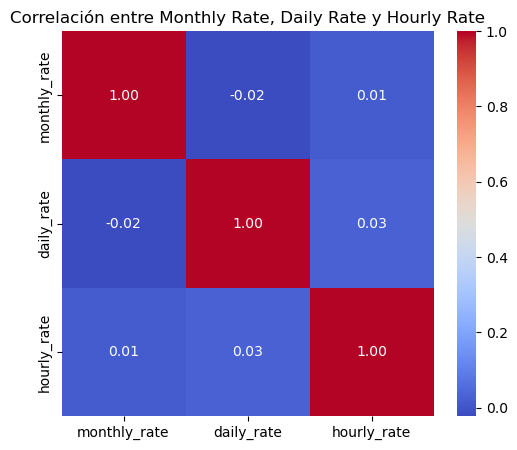

In [107]:
# Creating a graph to analyze its relationship with other income-related columns.
cols_tasa = ['monthly_rate', 'daily_rate', 'hourly_rate']
df_rates = df_talent[cols_tasa].apply(pd.to_numeric, errors='coerce')
corr_rates = df_rates.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_rates, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Monthly Rate, Daily Rate y Hourly Rate')
plt.show()

🔍 As observed, these columns are not related to each other or to Monthly Income, which would be the most relevant.
Since none of these columns add value to the analysis, we decide to remove them to prevent unnecessary noise in imputations and analyses.


In [108]:
# Verify the correct deletion of columns.
df_talent.drop(['monthly_rate', 'daily_rate', 'hourly_rate'], axis=1, inplace=True)
print(df_talent.columns.tolist())


['age', 'attrition', 'business_travel', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_number', 'environment_satisfaction', 'gender', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'num_companies_worked', 'over_18', 'overtime', 'percent_salary_hike', 'performance_rating', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'same_as_monthly_income', 'date_birth', 'salary', 'role_department', 'num_children', 'remote_work']


In [109]:
#6️⃣ DEPARTMENT: Contains a large number of null values.
print(df_talent["department"].unique())
print(df_talent['department'].isnull().sum())
round((df_talent['department'].isnull().sum() / len(df_talent)) * 100, 2)


[nan ' Research & Development ' ' Sales ' ' Human Resources ']
1312


81.29

In [110]:
# Standardize values according to the agreed rule and fill nulls with a new category: "unknown".
df_talent["department"] = df_talent["department"].str.strip().str.replace(" ", "_").str.lower()
df_talent["department"]= df_talent["department"].fillna("unknown")
print(df_talent["department"].unique())


['unknown' 'research_&_development' 'sales' 'human_resources']


In [111]:
#7️⃣ DISTANCE FROM HOME.
print(df_talent["distance_from_home"].describe())
print(df_talent["distance_from_home"].unique()[:20]) 


count    1614.000000
mean        4.527261
std        14.591913
min       -49.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        29.000000
Name: distance_from_home, dtype: float64
[  6   1   4   2   3  22  25   9   7  23  10  12  14 -13  15   8 -42  28
 -37   5]


In [112]:
# Contains 192 negative values.
valores_negativos = df_talent[df_talent['distance_from_home'] < 0]
conteo_negativos = valores_negativos['distance_from_home'].value_counts()
print(conteo_negativos)


distance_from_home
-13    11
-24    11
-12    11
-18     8
-38     7
-35     7
-47     7
-14     6
-42     6
-36     6
-19     6
-25     6
-31     6
-26     6
-48     5
-46     5
-22     5
-16     5
-10     5
-45     5
-32     4
-20     4
-37     4
-41     4
-29     4
-30     4
-27     4
-23     3
-11     3
-33     3
-15     3
-17     3
-44     3
-28     2
-34     2
-49     2
-21     2
-43     2
-39     1
-40     1
Name: count, dtype: int64


In [113]:
# After consulting with the Product Owner, we confirm that this was a data entry error (sign mistake).
# Convert negative values to positive and verify execution.
df_talent["distance_from_home"] = df_talent["distance_from_home"].abs() 
print(df_talent["distance_from_home"].describe())


count    1614.000000
mean       11.141884
std        10.450560
min         1.000000
25%         2.000000
50%         8.000000
75%        17.000000
max        49.000000
Name: distance_from_home, dtype: float64


In [114]:
#8️⃣ EDUCATION: Provides a numerical scale that appears to be ordered from lowest (1) to highest (5) education level.
# We map it as follows: 1- High School or Below, 2- College, 3- Bachelor, 4- Master, 5- Doctor. 
# No null values.
print(df_talent["education"].unique())
print(df_talent['education'].isnull().sum())


[3 4 2 1 5]
0


In [115]:
#9️⃣ EDUCATION FIELD: Contains irregularities and a high number of null values.
print(df_talent["education_field"].unique())
df_talent["education_field"] = df_talent["education_field"].str.strip().str.lower().str.replace(" ", "_")
print(df_talent["education_field"].unique())
print(df_talent['education_field'].isnull().sum())


[nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources']
[nan 'life_sciences' 'technical_degree' 'medical' 'other' 'marketing'
 'human_resources']
745


In [116]:
# Standardize according to our rule and create a new category for null values and verify correctness.
df_talent["education_field"]= df_talent["education_field"].fillna("unknown")
df_talent["education_field"].value_counts()


education_field
unknown             745
life_sciences       349
medical             276
marketing           104
technical_degree     69
other                59
human_resources      12
Name: count, dtype: int64

In [117]:
#🔟 EMPLOYEE COUNT: Contains only one unique value (1) for all records.
# As it provides no value to the analysis, we remove it.
print(df_talent["employee_count"].unique())
df_talent.drop(columns=["employee_count"], inplace=True)
print(df_talent.columns)


[1]
Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'num_companies_worked', 'over_18', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [118]:
#1️⃣1️⃣ EMPLOYEE NUMBER: Stored as an object instead of numeric. Represents a unique identifier for employees.
print(df_talent["employee_number"].sample(10))


183        NaN
456     1778,0
1135       NaN
577      355,0
771     1800,0
153        NaN
1141    1908,0
882      478,0
1215    1760,0
1305     622,0
Name: employee_number, dtype: object


In [119]:
# Clean and replace nulls with "unknown".
print(df_talent["employee_number"].dtype)
df_talent["employee_number"] = df_talent["employee_number"].fillna("unknown")
df_talent['employee_number'] = df_talent['employee_number'].str.split(',').str[0]
print(f"Porcentaje de Unknown: {(df_talent['employee_number'].eq('unknown').mean() * 100):.2f}%")


object
Porcentaje de Unknown: 26.70%


In [120]:
# After the initial regularization, and given the high percentage of missing employee IDs, we now check for duplicates. 
df_talent[df_talent['employee_number'].duplicated(keep=False)].sort_values('employee_number')

# We find duplicates with slight differences, so we continue cleaning before handling them.

,age,attrition,business_travel,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_department,num_children,remote_work
1483,33,no,non-travel,sales,8,1,life_sciences,1044,2,1,2,1,sales repResENTaTiVE,4,NaN,NaN,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sales repResENTaTiVE - Sales,NaN,0
987,33,no,non-travel,sales,8,1,life_sciences,1044,2,1,2,1,sALES ReprEsentatiVE,4,NaN,NaN,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sALES ReprEsentatiVE - Sales,NaN,False
1484,26,yes,unknown,unknown,2,3,life_sciences,1053,1,0,3,1,reSEArcH SCiEnTIst,1,Married,"2042,0",6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,Yes
988,26,yes,unknown,unknown,2,3,life_sciences,1053,1,0,3,1,rEsEaRCH SCIenTiSt,1,Married,"2042,0",6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,1
1486,46,no,unknown,unknown,1,4,medical,1069,4,0,3,5,rESEArCh DIrecTOR,4,NaN,NaN,9,NaN,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,NaN,1977,1000000000$,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,35,no,travel_rarely,unknown,8,4,technical_degree,unknown,3,0,3,1,HUMaN RESoUrCES,3,NaN,"4323,0",1,Y,No,17,"3,0",2,NaN,0,"6,0",2,"1,0",5,NaN,1,4,"4323,0",1988,1000000000$,NaN,NaN,1
610,54,no,unknown,unknown,2,4,life_sciences,unknown,3,1,2,3,sALES ExeCutiVe,3,Married,NaN,6,Y,No,11,"3,0",2,"80,0",1,"13,0",4,"3,0",9,NaN,7,0,NaN,1969,1000000000$,NaN,NaN,Yes
607,30,no,travel_rarely,unknown,8,2,unknown,unknown,3,0,3,3,SAles ExecutIve,3,NaN,NaN,5,NaN,No,11,"3,0",1,NaN,1,NaN,2,"4,0",8,NaN,7,7,NaN,1993,1000000000$,NaN,NaN,0
661,31,no,non-travel,unknown,5,3,medical,unknown,2,0,3,2,mAnuFaCTUrING direCTor,1,NaN,"9936,0",0,Y,No,19,"3,0",2,NaN,0,"10,0",2,"3,0",9,NaN,1,7,"9936,0",1992,1000000000$,NaN,NaN,Yes


In [121]:
#1️⃣2️⃣ ENVIRONMENT SATISFACTION: Confirmed by the Product Owner as a 1-4 scale rating employee satisfaction from low to high.
print(df_talent["environment_satisfaction"].unique()) 
print(df_talent["environment_satisfaction"].value_counts())
valores_fuera_rango = df_talent[~df_talent["environment_satisfaction"].isin([1, 2, 3, 4])]
cantidad_fuera_rango = valores_fuera_rango.shape[0]
print(cantidad_fuera_rango)

# Contains 100 incorrect values (6% errors).


[ 1  3  4  2 42 37 35 25 27 31 39 21 15 14 33 19 12 13 28 47 36 29 24 46
 16 22 41 49 11 48 18 10 45 38 17 20 26 43]
environment_satisfaction
4     460
3     459
1     298
2     297
12      7
35      6
13      6
14      5
24      5
47      5
36      4
48      4
41      4
46      4
42      4
45      3
11      3
22      3
17      3
18      3
20      3
25      3
27      3
37      2
29      2
19      2
38      2
31      2
15      2
16      2
26      1
39      1
10      1
49      1
21      1
28      1
33      1
43      1
Name: count, dtype: int64
100


In [122]:
# Calculating median, mean, and mode only for values inside the correct range correct values and we saw that besides it is not a perfect distribution it is balanced
mediana_valida = df_talent.loc[df_talent["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].median()
print(f"La mediana es: {mediana_valida}")
moda_valida = df_talent.loc[df_talent["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].mode()
print(f"La moda es: {moda_valida}")
media_valida = df_talent.loc[df_talent["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].mean()
print(f"La media es: {media_valida}")


La mediana es: 3.0
La moda es: 0    4
Name: environment_satisfaction, dtype: int64
La media es: 2.714002642007926


In [123]:
# Since the distribution is slightly unbalanced but not extreme, we impute incorrect values with the median.
mediana_environment = df_talent.loc[df_talent["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].median()
print(mediana_environment)
df_talent.loc[~df_talent["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"] = mediana_environment
print(df_talent["environment_satisfaction"].unique())


3.0
[1 3 4 2]


In [124]:
#1️⃣3️⃣ GENDER: Unique values are 0 and 1.
# Assign labels: 0 = Male, 1 = Female.
print(df_talent["gender"].unique())
df_talent["gender"] = df_talent["gender"].map({0: "male", 1: "female"})
print(df_talent["gender"].unique())


[0 1]
['male' 'female']


In [125]:
#1️⃣4️⃣ HOURLY RATE: Previously removed due to lack of impact on the analysis.


In [126]:
#1️⃣5️⃣ JOB INVOLVEMENT: Confirmed as a 1-4 scale measuring employee involvement.
print(df_talent["job_involvement"].unique())
print(df_talent["job_involvement"].value_counts())


[3 2 4 1]
job_involvement
3    955
2    406
4    164
1     89
Name: count, dtype: int64


In [127]:
#1️⃣6️⃣ JOB LEVEL: Represents hierarchical level in the company (low to high responsibility).
print(df_talent["job_level"].unique())
print(df_talent["job_level"].value_counts())


[5 4 3 2 1]
job_level
2    597
1    586
3    242
4    113
5     76
Name: count, dtype: int64


In [128]:
#1️⃣7️⃣ JOB ROLE: Represents employee position. No null values but has inconsistent formatting.

print(df_talent["job_role"].unique())
print(df_talent["job_role"].nunique()) 
print(df_talent["job_role"].isnull().sum()) 


[' resEArch DIREcToR ' ' ManAGeR ' ' ManaGER ' ... ' sAlES ExECUTivE '
 ' SaLes ExecUtIVe ' ' mAnUfactURInG DiRECTOr ']
1579
0


In [129]:
# Normalize by removing spaces and converting to lowercase.
df_talent["job_role"] = (df_talent["job_role"].astype(str).str.strip().str.lower())
print(df_talent["job_role"].unique())
print(df_talent["job_role"].nunique()) 


['research director' 'manager' 'sales executive' 'manufacturing director'
 'research scientist' 'healthcare representative' 'laboratory technician'
 'sales representative' 'human resources']
9


In [130]:
#1️⃣8️⃣ JOB SATISFACTION: 1-4 scale rating employee job satisfaction (low to high).
# After speaking with the Product Owner, he confirms that it is the level of employee satisfaction with their work on a scale from lowest to highest.
print(df_talent["job_satisfaction"].unique()) 
print(df_talent["job_satisfaction"].value_counts()) 
print(df_talent["job_satisfaction"].isnull().sum()) 


[3 4 1 2]
job_satisfaction
4    514
3    481
1    317
2    302
Name: count, dtype: int64
0


In [131]:
#1️⃣9️⃣ MARITAL STATUS: Contains 651 nulls and duplicated misspellings.
print(df_talent["marital_status"].unique())
print(df_talent["marital_status"].value_counts())
print(df_talent["marital_status"].isnull().sum())


[nan 'Married' 'Divorced' 'Single' 'divorced' 'Marreid']
marital_status
Married     404
Single      325
Divorced    188
Marreid      35
divorced     11
Name: count, dtype: int64
651


In [132]:
# Cleaned spelling and verifying correctness.
df_talent["marital_status"] = df_talent["marital_status"].str.strip().str.lower()
df_talent["marital_status"] = df_talent["marital_status"].replace({"marreid": "married"})
print(df_talent["marital_status"].unique())


[nan 'married' 'divorced' 'single']


In [133]:
# Create a new category "unknown" for null values
df_talent["marital_status"].fillna("unknown", inplace=True) 
print(df_talent["marital_status"].unique())
print(df_talent["marital_status"].value_counts())
print(df_talent["marital_status"].isnull().sum())


['unknown' 'married' 'divorced' 'single']
marital_status
unknown     651
married     439
single      325
divorced    199
Name: count, dtype: int64
0


In [134]:
#2️⃣0️⃣ MONTHLY INCOME: Stored as object instead of numeric. 52% null values.
print(df_talent["monthly_income"].unique()[:10])

# Clean and convert to float.
df_talent["monthly_income"] = (df_talent["monthly_income"].astype(str).str.replace(",", ".").str.replace(r"[^\d.]", "", regex=True).replace("", np.nan).replace("nan", np.nan).astype(float))
print(df_talent["monthly_income"].dtype) 
print(df_talent["monthly_income"].describe())

# This is a critical column, so we will revisit it after cleaning the rest of the dataset.


['19537,0' '19999,0' '19232,0' '17169,0' nan '17174,0' '16595,0' '19973,0'
 '13402,0' '13206,0']
float64
count      771.000000
mean      6477.686122
std       4766.119959
min       1009.000000
25%       2880.000000
50%       4859.000000
75%       8230.500000
max      19999.000000
Name: monthly_income, dtype: float64


In [135]:
#2️⃣1️⃣ MONTHLY RATE: Previously removed due to lack of impact.


In [136]:
#2️⃣2️⃣ NUM COMPANIES WORKED: Data appears valid and has no nulls.
print(df_talent['num_companies_worked'].unique())
print(df_talent['num_companies_worked'].describe())


[7 0 1 3 2 4 8 9 5 6]
count    1614.000000
mean        2.673482
std         2.506152
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: num_companies_worked, dtype: float64


In [137]:
#2️⃣3️⃣ OVER 18: Unnecessary since the 'age' column confirms all employees are over 18.
# We decide to remove the column.
df_talent.drop(columns=['over_18'], inplace=True)


In [138]:
#2️⃣4️⃣ OVERTIME: Indicates whether employees work overtime.
print(df_talent["overtime"].unique())
print(df_talent["overtime"].value_counts(dropna=False))


['No' nan 'Yes']
overtime
No     682
NaN    676
Yes    256
Name: count, dtype: int64


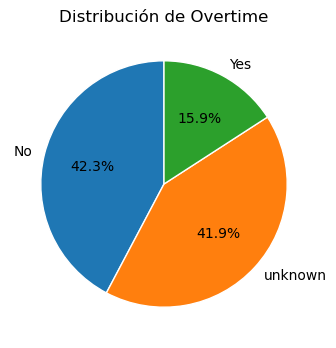

In [139]:
# As we have seen in other columns, the poor quality of data collection makes it extremely difficult to manage this 41% of null values ​​in OVERTIME.
# We created a new category for null values, and for the analysis, we'll take into account the low reliability of the data.

df_talent["overtime"].fillna("unknown", inplace=True)
overtime_counts = df_talent["overtime"].value_counts()

plt.figure(figsize=(4,4))
plt.pie(overtime_counts, labels=overtime_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title("Distribución de Overtime")
plt.show()


In [140]:
#2️⃣5️⃣ PERCENT SALARY HIKE: Percentage salary increase.
# There are expected values ​​for this column and no null values. However, we are concerned that the underrepresented values ​​may be outliers.print(df_talento['percent_salary_hike'].unique())
print(df_talent['percent_salary_hike'].describe())
print(df_talent['percent_salary_hike'].value_counts())
print(df_talent['percent_salary_hike'].isnull().sum())


count    1614.000000
mean       15.165428
std         3.648610
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: percent_salary_hike, dtype: float64
percent_salary_hike
11    232
13    230
12    225
14    220
15    110
18     98
17     88
16     86
19     82
20     60
22     59
21     51
23     29
24     25
25     19
Name: count, dtype: int64
0


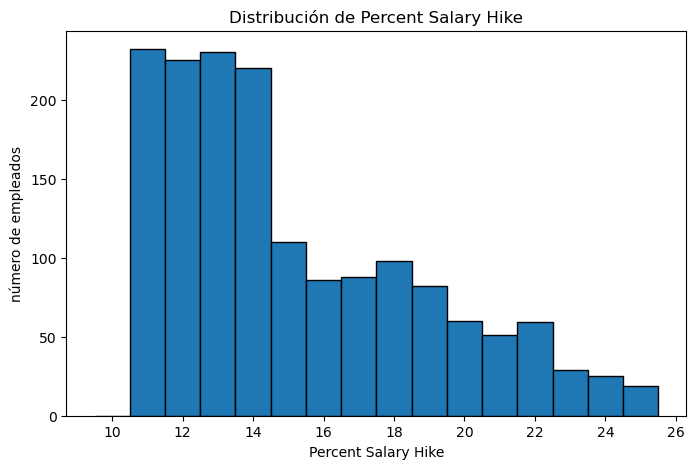

In [141]:
# We make a graph to see the type of distribution and we verify that the majority moves in a range between 11 and 14.
plt.figure(figsize=(8,5))
plt.hist(df_talent['percent_salary_hike'], bins=range(10, 27), edgecolor='black', align='left')
plt.xlabel("Percent Salary Hike")
plt.ylabel("número de empleados")
plt.title("Distribución de Percent Salary Hike")
plt.show()


In [142]:
# By calculating the limits, we have already ensured that even if larger values ​​appear, they are within the limits, so they are real values.
q1 = df_talent['percent_salary_hike'].quantile(0.25)
q3 = df_talent['percent_salary_hike'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print(f'el rango intercuartilico es: {iqr}')
print(f'el limite inferior es: {limite_inferior}')
print(f'el limite superior es: {limite_superior}')


el rango intercuartilico es: 6.0
el limite inferior es: 3.0
el limite superior es: 27.0


In [143]:
#2️⃣6️⃣ PERFORMANCE RATING: Measures employee productivity (scale 3-4).
# •	12% null values
print(df_talent['performance_rating'].unique())
print(df_talent['performance_rating'].value_counts())
print(df_talent['performance_rating'].isnull().sum())


['3,0' '4,0' nan]
performance_rating
3,0    1205
4,0     214
Name: count, dtype: int64
195


In [144]:
# The values ​​are objects, we proceed to convert them to numeric values ​​in order to handle nulls.
df_talent['performance_rating'] = df_talent['performance_rating'].astype(str).str.replace(',', '.').astype(float)
print(df_talent['performance_rating'].unique())
print(df_talent['performance_rating'].dtype)


[ 3.  4. nan]
float64


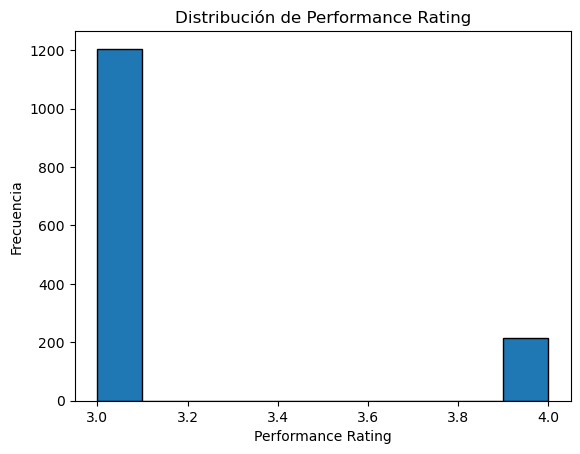

In [145]:
# We create a graph to visualize the variable's distribution.
plt.hist(df_talent['performance_rating'], bins=10, edgecolor='black')
plt.title('Distribución de Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Frecuencia')
plt.show()


In [146]:
# Since it is highly skewed and has little variability, we decide to replace the missing values with the median to maintain the variable's trend, then we verify the changes.
df_talent['performance_rating'].fillna(df_talent['performance_rating'].median(), inplace=True)
print(df_talent['performance_rating'].unique())
print(df_talent['performance_rating'].value_counts())
print(df_talent['performance_rating'].isnull().sum()) 


[3. 4.]
performance_rating
3.0    1400
4.0     214
Name: count, dtype: int64
0


In [147]:
#2️⃣7️⃣ RELATIONSHIP SATISFACTION: A scale from 1 to 4 that evaluates employees' satisfaction with their interpersonal relationships, increasing from low to high.
# The values are within the expected range.

print(df_talent['relationship_satisfaction'].unique())
print(df_talent['relationship_satisfaction'].describe())
print(df_talent['relationship_satisfaction'].value_counts())
print(df_talent['relationship_satisfaction'].isnull().sum())


[3 1 4 2]
count    1614.000000
mean        2.704461
std         1.079031
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: relationship_satisfaction, dtype: float64
relationship_satisfaction
3    504
4    468
2    339
1    303
Name: count, dtype: int64
0


In [148]:
#2️⃣8️⃣ STANDARD HOURS: Indicates working hours, meaning whether the job is full-time or part-time.
print(df_talent['standard_hours'].unique())
print(df_talent['standard_hours'].value_counts())
print(df_talent['standard_hours'].isnull().sum())


[nan '80,0']
standard_hours
80,0    419
Name: count, dtype: int64
1195


In [149]:
# We find that this column has only one type of value and 74% missing values.
# We do not see how this column would be useful for the analysis, so after consulting with the Product Owner, we decide to remove it.
df_talent.drop(['standard_hours'], axis=1, inplace=True)
print(df_talent.columns)


Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'num_companies_worked', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [150]:
#2️⃣9️⃣ STOCK OPTION LEVEL: A numerical scale from 0 to 3 representing a classification of employees based on the number of stock options they have.
# It appears to be correct, with no necessary modifications.
print(df_talent['stock_option_level'].unique())
print(df_talent['stock_option_level'].value_counts())
print(df_talent['stock_option_level'].isnull().sum())
print(df_talent['stock_option_level'].describe())


[0 1 2 3]
stock_option_level
0    687
1    666
2    172
3     89
Name: count, dtype: int64
0
count    1614.000000
mean        0.791202
std         0.842396
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: stock_option_level, dtype: float64


In [151]:
#3️⃣0️⃣ TOTAL WORKING YEARS: Represents the total number of years an employee has worked.
print(df_talent['total_working_years'].unique())
print(df_talent['total_working_years'].value_counts())
print(df_talent['total_working_years'].isnull().sum())


[nan '34,0' '22,0' '28,0' '20,0' '21,0' '33,0' '40,0' '18,0' '25,0' '15,0'
 '17,0' '26,0' '16,0' '24,0' '14,0' '23,0' '27,0' '19,0' '11,0' '38,0'
 '37,0' '13,0' '12,0' '29,0' '10,0' '36,0' '35,0' '9,0' '31,0' '32,0'
 '8,0' '7,0' '30,0' '6,0' '5,0' '4,0' '3,0' '2,0' '1,0' '0,0']
total_working_years
10,0    144
8,0      86
6,0      84
9,0      69
5,0      66
7,0      56
4,0      54
1,0      53
12,0     34
3,0      32
14,0     30
13,0     30
11,0     29
15,0     28
16,0     28
20,0     28
18,0     27
21,0     23
17,0     22
2,0      21
22,0     18
19,0     17
24,0     14
23,0     13
28,0     13
26,0      8
0,0       8
29,0      6
36,0      6
25,0      6
33,0      6
37,0      5
27,0      5
31,0      4
30,0      3
32,0      3
35,0      3
40,0      3
34,0      2
38,0      1
Name: count, dtype: int64
526


In [152]:
# We normalize values following the agreed-upon guidelines.
df_talent['total_working_years'] = df_talent['total_working_years'].astype(str).str.replace(',', '.').astype(float)
print(df_talent['total_working_years'].dtype)
print(df_talent['total_working_years'].unique()) 


float64
[nan 34. 22. 28. 20. 21. 33. 40. 18. 25. 15. 17. 26. 16. 24. 14. 23. 27.
 19. 11. 38. 37. 13. 12. 29. 10. 36. 35.  9. 31. 32.  8.  7. 30.  6.  5.
  4.  3.  2.  1.  0.]


In [153]:
print(df_talent['total_working_years'].describe())


count    1088.000000
mean       11.318934
std         7.727675
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: total_working_years, dtype: float64


Text(0, 0.5, 'Cantidad de Empleados')

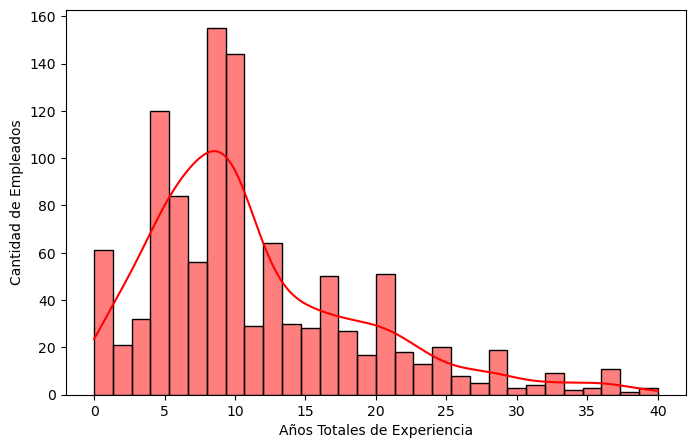

In [154]:
# We create a graph to visualize the distribution before deciding how to handle the 32% of missing values in this column.
plt.figure(figsize=(8,5))
sns.histplot(df_talent['total_working_years'], bins=30, kde=True, color="red")
plt.xlabel("Años Totales de Experiencia")
plt.ylabel("Cantidad de Empleados")


🔍 The graph clearly shows an asymmetric distribution with a greater concentration of lower values.
This indicates that most employees have between 5 and 10 years of experience, and beyond 15 years, the number of employees drops significantly.

As with other variables, we decide to complete the dataset cleaning process before imputing these missing values.


In [155]:
#3️⃣1️⃣ TRAINING LAST YEAR: Indicates the number of training courses employees attended last year, represented on a scale from 0 to 6, with valid values.
print(df_talent['training_times_last_year'].unique())
print(df_talent['training_times_last_year'].value_counts())
print(df_talent['training_times_last_year'].isnull().sum())
print(df_talent['training_times_last_year'].describe())


[5 3 2 0 1 4 6]
training_times_last_year
2    598
3    534
4    137
5    136
1     77
6     72
0     60
Name: count, dtype: int64
0
count    1614.000000
mean        2.809789
std         1.297765
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: training_times_last_year, dtype: float64


In [156]:
#3️⃣2️⃣ WORK LIFE BALANCE: A scale from 1 to 4 that reflects employees' work-life balance, from poor to excellent.
print(df_talent['work_life_balance'].unique())
print(df_talent['work_life_balance'].value_counts())
print(df_talent['work_life_balance'].isnull().sum())


['3,0' nan '2,0' '4,0' '1,0']
work_life_balance
3,0    913
2,0    359
4,0    155
1,0     79
Name: count, dtype: int64
108


In [157]:
# Running .describe(), we see that this column has little dispersion and some symmetry, with most employees in level 3.
df_talent['work_life_balance'] = df_talent['work_life_balance'].astype(str).str.replace(',', '.').astype(float)
print(df_talent['work_life_balance'].describe())


count    1506.000000
mean        2.759628
std         0.702622
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: work_life_balance, dtype: float64


In [158]:
# Based on this, we decide to impute missing values using the median.
median_value = df_talent['work_life_balance'].median()
df_talent['work_life_balance'].fillna(median_value, inplace=True)
print(df_talent['work_life_balance'].isnull().sum()) 
print(df_talent['work_life_balance'].describe())


0
count    1614.000000
mean        2.775713
std         0.681347
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: work_life_balance, dtype: float64


In [159]:
#3️⃣3️⃣ YEARS AT COMPANY: The values appear to be within the expected range, with no errors.
print(df_talent['years_at_company'].unique())
print(df_talent['years_at_company'].value_counts())
print(df_talent['years_at_company'].describe())


[20 33 22 19 21 18 24 31 26 16 23 15 17 32 14 13 25 12 11 37 40 36 27 29
 10  9 30  8  7 34  6  5  4  2  3  1  0]
years_at_company
5     208
1     171
3     141
2     141
10    133
7     115
4     114
8     106
9      94
6      78
0      44
11     36
20     29
13     26
15     21
14     19
22     17
12     15
18     15
16     14
21     14
19     12
17      9
24      7
25      5
33      5
26      4
32      3
27      3
31      3
36      3
29      2
23      2
40      2
34      1
37      1
30      1
Name: count, dtype: int64
count    1614.000000
mean        7.132590
std         6.124237
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: years_at_company, dtype: float64


In [160]:
#3️⃣4️⃣ YEARS IN CURRENT ROLE: Number of years an employee has held their current position.
print(df_talent['years_in_current_role'].unique())
print(df_talent['years_in_current_role'].value_counts())
print(df_talent['years_in_current_role'].isnull().sum())


[nan '13,0' '12,0' '11,0' '7,0' '6,0' '4,0' '3,0' '2,0' '1,0' '0,0']
years_in_current_role
2,0     11
7,0      5
0,0      4
4,0      3
1,0      3
11,0     2
6,0      2
3,0      2
13,0     1
12,0     1
Name: count, dtype: int64
1580


In [161]:
# It has 97% missing values, and since the information is redundant, we decide to remove it.
df_talent.drop(columns=["years_in_current_role"], inplace=True)


In [162]:
#3️⃣5️⃣ YEARS SINCE LAST PROMOTION: Values are within the expected range, with no errors.
print(df_talent['years_since_last_promotion'].unique())
print(df_talent['years_since_last_promotion'].value_counts())
print(df_talent['years_since_last_promotion'].isnull().sum())


[15 11  5  2  4  7  0  1 13 14  8 12  3  6 10  9]
years_since_last_promotion
0     625
1     384
2     177
7      93
4      67
3      62
5      53
6      37
11     26
8      20
9      18
15     15
12     11
13     10
14     10
10      6
Name: count, dtype: int64
0


In [163]:
#3️⃣6️⃣ YEARS WITH CURRENT MANAGER: Values appear normal, within the expected range, with no errors.
print(df_talent['years_with_curr_manager'].unique())
print(df_talent['years_with_curr_manager'].value_counts())
print(df_talent['years_with_curr_manager'].isnull().sum())


[15  9  6  8  7 11 10 12  4  0  5 17  2 14  1 13  3 16]
years_with_curr_manager
2     380
0     270
7     267
3     148
8     115
4     104
1      84
9      70
5      36
10     31
6      30
11     22
12     20
13     16
17      8
15      5
14      5
16      3
Name: count, dtype: int64
0


In [164]:
#3️⃣7️⃣ SAME AS MONTHLY INCOME: We normalize the data in this column to compare it with "monthly income" since we suspect they contain the same information.
print(df_talent["same_as_monthly_income"].unique()[:10])
df_talent["same_as_monthly_income"] = (df_talent["same_as_monthly_income"].astype(str).str.replace(",", ".").str.replace(r"[^\d.]", "", regex=True).replace("", np.nan).replace("nan", np.nan).astype(float))
df_talent['monthly_income'].equals(df_talent['same_as_monthly_income'])



['19537,0' '19999,0' '19232,0' '17169,0' nan '17174,0' '16595,0' '19973,0'
 '13402,0' '13206,0']


True

In [165]:
# After verifying that they are identical, we decide to remove this column and confirm its deletion.
df_talent.drop('same_as_monthly_income', axis=1, inplace=True)
print(df_talent.columns)


Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'num_companies_worked', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [166]:
#3️⃣8️⃣ DATE BIRTH: Contains only the year of birth and appears to be correct.
print(df_talent['date_birth'].unique())
print(df_talent['date_birth'].isnull().sum())


[1972 1971 1981 1976 1977 1975 1964 1982 1967 1985 1968 1983 1965 1988
 1978 1990 1987 1989 1970 1980 1963 1991 1986 1974 1984 1973 1979 1993
 1994 1992 1969 1966 1996 1995 1997 1998 1999 2000 2001 2002 2003 2004
 2005]
0


In [167]:
#3️⃣9️⃣ SALARY: This column does not provide useful information, so we decide to remove it.
print(df_talent['salary'].unique())
print(df_talent['salary'].value_counts())
df_talent.drop(columns=['salary'], inplace=True)


['1000000000$']
salary
1000000000$    1614
Name: count, dtype: int64


In [168]:
#4️⃣0️⃣ ROLE DEPARTMENT: Contains many inconsistencies.
print(df_talent['role_department'].unique())
print(df_talent['role_department'].value_counts())
print(df_talent['role_department'].isnull().sum())


[nan ' ManaGER  -  Research & Development '
 ' MANAger  -  Research & Development '
 ' heaLtHcArE repResENtATiVe  -  Research & Development '
 ' saLEs exEcutIVe  -  Sales ' ' Sales ExECuTIVe  -  Sales '
 ' heALthCArE RePResEntaTIVe  -  Research & Development '
 ' lABORAtOry tECHnIcIan  -  Research & Development '
 ' ManufactUrINg DiReCTOr  -  Research & Development '
 ' SaleS eXEcUtIVE  -  Sales '
 ' HEaLthcaRe rEprEsEnTAtiVe  -  Research & Development '
 ' rESeArCH sCientIST  -  Research & Development '
 ' healTHCAre rePREseNtATiVE  -  Research & Development '
 ' mANaGer  -  Research & Development '
 ' HEAltHCaRe REPreseNTatIve  -  Research & Development '
 ' SaLeS eXECUTivE  -  Sales '
 ' reSeARCH SCIEnTiST  -  Research & Development '
 ' ReSearch DiRecTOR  -  Research & Development '
 ' resEaRCh SciEnTist  -  Research & Development '
 ' hUmaN REsoUrCes  -  Human Resources '
 ' manAgER  -  Research & Development ' ' SaLES eXeCUtIVE  -  Sales '
 ' reSEarCH scIentISt  -  Research & Dev

In [169]:
# We normalize the values following the established guidelines.
df_talent['role_department'] = df_talent['role_department'].str.strip().str.lower()
print(df_talent['role_department'].nunique())
print(df_talent['role_department'].value_counts())


11
role_department
sales executive  -  sales                               69
research scientist  -  research & development           62
laboratory technician  -  research & development        56
healthcare representative  -  research & development    26
manufacturing director  -  research & development       22
sales representative  -  sales                          17
research director  -  research & development            16
manager  -  research & development                      14
human resources  -  human resources                     14
manager  -  sales                                        5
manager  -  human resources                              1
Name: count, dtype: int64


In [170]:
# The "role_department" column is actually a combination of "job role" and "department."
# This will help us fill in missing values.
df_talent[df_talent['department'] != 'unknown'].groupby('job_role')['department'].value_counts()


job_role                   department            
healthcare representative  research_&_development    26
human resources            human_resources           14
laboratory technician      research_&_development    56
manager                    research_&_development    14
                           sales                      5
                           human_resources            1
manufacturing director     research_&_development    22
research director          research_&_development    16
research scientist         research_&_development    62
sales executive            sales                     69
sales representative       sales                     17
Name: count, dtype: int64

In [171]:
# Each job role is associated with a single department, except for "manager," which appears in several.
# This allows us to create a dictionary with the most common department for each job role.


dic_job_to_dept = df_talent[df_talent['department'] != 'unknown'].groupby('job_role')['department'].agg(lambda x: x.value_counts().idxmax()).to_dict()
print(dic_job_to_dept)


{'healthcare representative': 'research_&_development', 'human resources': 'human_resources', 'laboratory technician': 'research_&_development', 'manager': 'research_&_development', 'manufacturing director': 'research_&_development', 'research director': 'research_&_development', 'research scientist': 'research_&_development', 'sales executive': 'sales', 'sales representative': 'sales'}


In [172]:
# Using this dictionary, we can fill in the unknown values in the "department" column more coherently based on the available data.
df_talent.loc[df_talent['department'] == 'unknown', 'department'] = df_talent.loc[df_talent['department'] == 'unknown', 'job_role'].map(dic_job_to_dept)

# We verify and check if any "unknown" values remain.
print(df_talent['department'].value_counts())
print("En la columna departamento quedan UNKNOWN:", (df_talent['department'] == 'unknown').sum())


department
research_&_development    1092
sales                      464
human_resources             58
Name: count, dtype: int64
En la columna departamento quedan UNKNOWN: 0


In [173]:
# Now that we have filled in the missing values for "department," the "role_department" column becomes redundant, so we proceed to delete it.
df_talent.drop('role_department', axis=1, inplace=True)


In [174]:
#4️⃣1️⃣ NUMBER OF CHILDREN: No data is available, so we proceed to remove it.
print(df_talent['num_children'].unique())
print(df_talent['num_children'].value_counts())
df_talent.drop(columns=["num_children"], inplace=True)


[nan]
Series([], Name: count, dtype: int64)


In [175]:
#4️⃣2️⃣ REMOTE WORK: Indicates whether employees work remotely or not.
print(df_talent['remote_work'].unique())
print(df_talent['remote_work'].value_counts())
print(df_talent['remote_work'].info())


['Yes' '1' 'False' '0' 'True']
remote_work
1        360
True     345
0        309
False    305
Yes      295
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: remote_work
Non-Null Count  Dtype 
--------------  ----- 
1614 non-null   object
dtypes: object(1)
memory usage: 12.7+ KB
None


In [176]:
# We see multiple variations in responses, so we normalize them using binary logic and verify the results.
df_talent['remote_work'] = df_talent['remote_work'].replace({
  "Yes": "yes",
   1 : "yes",
   0 : "no",
   "1": "yes",
   "0": "no",
  "True": "yes", 
  "False": "no",
  True: "yes", 
  False: "no"
    })
print(df_talent['remote_work'].value_counts())


remote_work
yes    1000
no      614
Name: count, dtype: int64


### **HANDLING MISSING VALUES AND DUPLICATES**
Once we have normalized all values and handled categorical and numerical missing values with low percentages, we will now address duplicates and the high percentages of missing values in the columns that concerned us the most:
- employee_number 
- mmonthly_income
- total_working_years

In [177]:
df_talent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1614 non-null   int32  
 1   attrition                   1614 non-null   object 
 2   business_travel             1614 non-null   object 
 3   department                  1614 non-null   object 
 4   distance_from_home          1614 non-null   int64  
 5   education                   1614 non-null   int64  
 6   education_field             1614 non-null   object 
 7   employee_number             1614 non-null   object 
 8   environment_satisfaction    1614 non-null   int64  
 9   gender                      1614 non-null   object 
 10  job_involvement             1614 non-null   int64  
 11  job_level                   1614 non-null   int64  
 12  job_role                    1614 non-null   object 
 13  job_satisfaction            1614 

In [178]:
null_percent = (df_talent.isnull().sum() / len(df_talent) * 100).sort_values(ascending=False)
null_percent[null_percent > 0]


monthly_income         52.230483
total_working_years    32.589839
dtype: float64

### Employee Number

In [179]:
# Since we previously replaced all missing values with 'unknown', we will now handle duplicates in 'employee_number'.
# To correctly manage duplicates, we will separate real employee numbers from the 'unknown' values and count each category.
df_reales = df_talent[df_talent['employee_number'] != 'unknown']
df_unknowns = df_talent[df_talent['employee_number'] == 'unknown']
print("Before cleaning duplicates...")
print("Employees with a REAL employee_number:", df_reales.shape[0])
print("Employees with an 'unknown' employee_number:", df_unknowns.shape[0])
print("TOTAL employees:", df_reales.shape[0] + df_unknowns.shape[0])


Before cleaning duplicates...
Employees with a REAL employee_number: 1183
Employees with an 'unknown' employee_number: 431
TOTAL employees: 1614


In [180]:
# Next, we eliminate duplicates only among real employee numbers and check the results after this removal.
df_reales = df_reales.drop_duplicates(subset='employee_number', keep='first')
print("Employees with a REAL employee_numberL:", df_reales.shape[0])
print("Employees with an 'unknown' employee_number:", df_unknowns.shape[0])
print("TOTAL employees:", df_reales.shape[0] + df_unknowns.shape[0])


Employees with a REAL employee_numberL: 1079
Employees with an 'unknown' employee_number: 431
TOTAL employees: 1510


In [181]:
# We merge the data again and verify.
df_talento_final = pd.concat([df_reales, df_unknowns], ignore_index=True)
print("consolidated DataFrame:")
print("TOTAL employees:", df_talento_final.shape[0])
df_talento_final.info()


consolidated DataFrame:
TOTAL employees: 1510
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1510 non-null   int32  
 1   attrition                   1510 non-null   object 
 2   business_travel             1510 non-null   object 
 3   department                  1510 non-null   object 
 4   distance_from_home          1510 non-null   int64  
 5   education                   1510 non-null   int64  
 6   education_field             1510 non-null   object 
 7   employee_number             1510 non-null   object 
 8   environment_satisfaction    1510 non-null   int64  
 9   gender                      1510 non-null   object 
 10  job_involvement             1510 non-null   int64  
 11  job_level                   1510 non-null   int64  
 12  job_role                    1510 non-null   

In [182]:
df_talent = df_talento_final


In [183]:
df_talent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1510 non-null   int32  
 1   attrition                   1510 non-null   object 
 2   business_travel             1510 non-null   object 
 3   department                  1510 non-null   object 
 4   distance_from_home          1510 non-null   int64  
 5   education                   1510 non-null   int64  
 6   education_field             1510 non-null   object 
 7   employee_number             1510 non-null   object 
 8   environment_satisfaction    1510 non-null   int64  
 9   gender                      1510 non-null   object 
 10  job_involvement             1510 non-null   int64  
 11  job_level                   1510 non-null   int64  
 12  job_role                    1510 non-null   object 
 13  job_satisfaction            1510 

### Monthly Income

In [184]:
# We now check for missing values and basic statistics for this column.
print("Valores nulos en 'monthly_income':", df_talent['monthly_income'].isnull().sum())
print(df_talent['monthly_income'].describe())


Valores nulos en 'monthly_income': 799
count      711.000000
mean      6527.918425
std       4810.541121
min       1009.000000
25%       2906.500000
50%       4850.000000
75%       8456.000000
max      19999.000000
Name: monthly_income, dtype: float64


In [185]:
# We will handle these missing values using advanced imputation.
monthly_income_iter= IterativeImputer(max_iter = 100, random_state = 42)
df_talent['monthly_income'] = monthly_income_iter.fit_transform(df_talent[['monthly_income']])


### Total Working Years

In [186]:
# We analyze the missing values and basic statistics for this column.
print("Null values in total working years", df_talent['total_working_years'].isnull().sum())
print(df_talent['total_working_years'].describe())


Null values in total working years 494
count    1016.000000
mean       11.314961
std         7.794100
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: total_working_years, dtype: float64


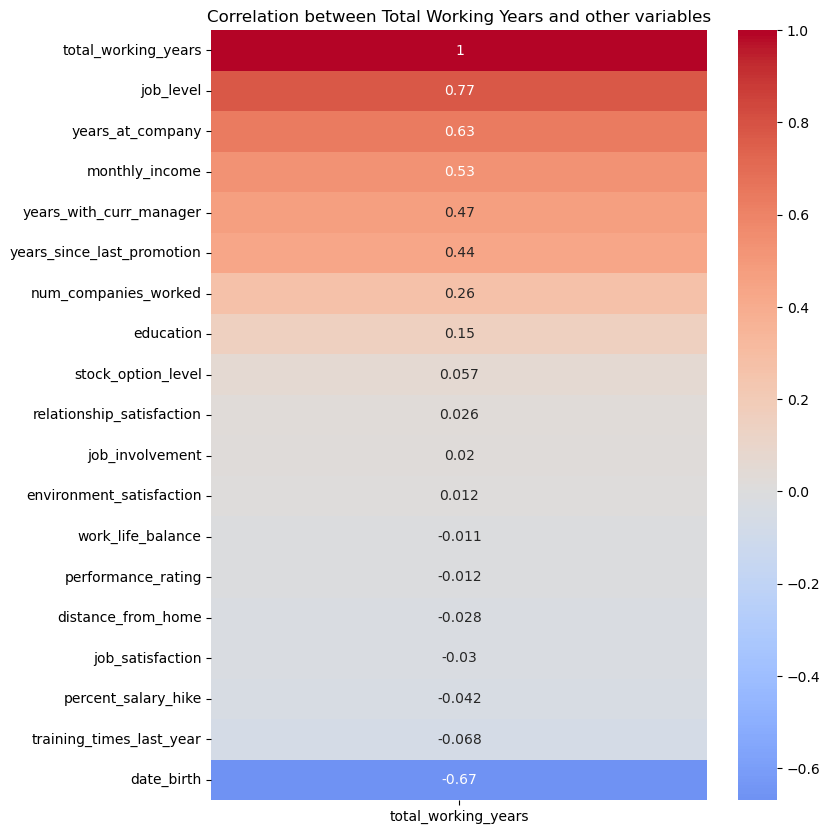

In [187]:
# We create a heatmap to identify the variables with the strongest relationships.
df_numeric = df_talent.select_dtypes(include=['float64', 'int64'])
corr = df_numeric.corr()
corr_total_working_years = corr[['total_working_years']].sort_values(by='total_working_years', ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(corr_total_working_years, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Total Working Years and other variables')
plt.show()



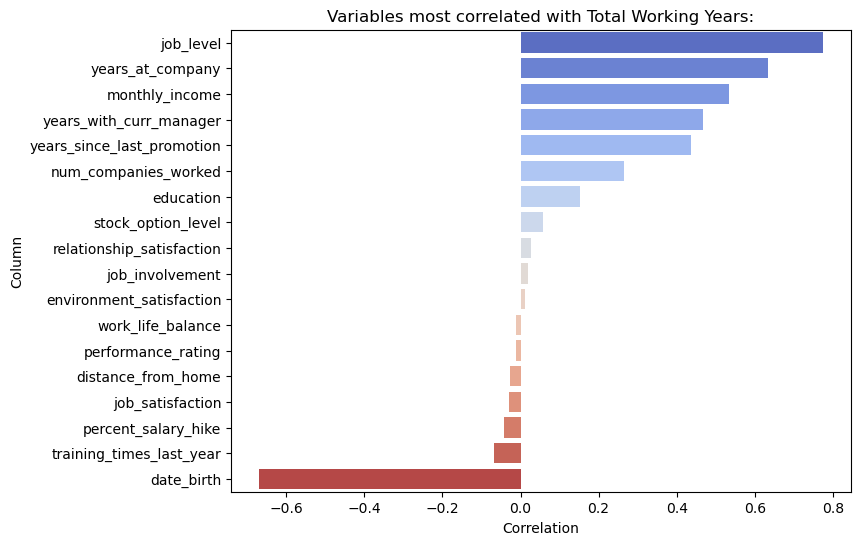

In [188]:
# A correlation ranking bar chart.
corr = df_numeric.corr()['total_working_years'].drop('total_working_years').sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Variables most correlated with Total Working Years:')
plt.xlabel('Correlation')
plt.ylabel('Column')
plt.show()


In [189]:
# These identified variables will help us perform advanced imputation.
varia_working_years = ['total_working_years', 'job_level', 'monthly_income', 'age', 'years_at_company', 'years_with_curr_manager', 'years_since_last_promotion']
df_knn_imputer = df_talent[varia_working_years]
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputado = knn_imputer.fit_transform(df_knn_imputer)
df_talent['total_working_years'] = df_knn_imputado[:, 0]

print("Missing values in total_working_years after imputation:", df_talent['total_working_years'].isnull().sum())
print(df_talent['total_working_years'].describe())


NameError: name 'KNNImputer' is not defined

In [ ]:
# We verify that there are no missing values.
df_talent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1510 non-null   int32  
 1   attrition                   1510 non-null   object 
 2   business_travel             1510 non-null   object 
 3   department                  1510 non-null   object 
 4   distance_from_home          1510 non-null   int64  
 5   education                   1510 non-null   int64  
 6   education_field             1510 non-null   object 
 7   employee_number             1510 non-null   object 
 8   environment_satisfaction    1510 non-null   int64  
 9   gender                      1510 non-null   object 
 10  job_involvement             1510 non-null   int64  
 11  job_level                   1510 non-null   int64  
 12  job_role                    1510 non-null   object 
 13  job_satisfaction            1510 

In [ ]:
# Once everything is clean, we notice that some columns were stored as floats due to missing values. Since they represent value scales, it is more logical to convert them to integers.
cols_to_int = ['performance_rating', 'total_working_years', 'work_life_balance']
for col in cols_to_int:
    df_talent[col] = df_talent[col].round().astype(int)
print("Conversion to int completed.")


Conversión a int completada


### END of the cleaning and transformation process
Now, we can save our cleaned and optimized CSV file.

In [ ]:
filename = 'df_talento_limpio.csv'
df_talent.to_csv(filename, index=False, encoding='utf-8')
ruta = os.path.join(os.getcwd(), filename)
print(f"Clean and ready dataset saved in: {ruta}")
print("💃🏻 Cleaning completed and dataset successfully saved! 💃🏻")


Dataset limpio y listo guardado en: c:\Users\hermy\Escritorio\ADALAB CURSO\Curso Adalab\MODULO 3\Proyecto\Proyecto\df_talento_limpio.csv
💃🏻 ¡Limpieza terminada y dataset guardado! 💃🏻
